=== Part (b): fraction of H atoms fast enough for n = 1 → 2 excitation ===

1. Excitation energy and threshold speed
   Bohr energies: Eₙ = −13.6 eV · n⁻²
   E₁ = -13.6 eV,  E₂ = -3.4 eV
   ΔE = E₂ − E₁ ≈ 10.2 eV
   In joules: ΔE ≈ 1.634×10⁻¹⁸ J

   Threshold speed from ½ m vₘᵢₙ² = ΔE:
      vₘᵢₙ = √(2 ΔE ÷ m)
   Numerically: vₘᵢₙ ≈ 4.424×10⁴ m/s

2. Maxwell–Boltzmann speed distribution at 10⁴ K
   f(v) = 4 π (m ÷ 2 π k T)³ᐟ² v² exp[− m v² ÷ (2 k T)]
   v̄ ≈ 1.451×10⁴ m/s
   vₘₚ   ≈ 1.286×10⁴ m/s

3. Tail probability F = ∫[vₘᵢₙ, ∞) f(v) dv
   Compute ∫₀^vₘᵢₙ f(v) dv with RK4 and subtract from 1:
      ∫₀^vₘᵢₙ f(v) dv ≈ 9.999708e-01 (≈ 10.000×10⁻¹)
      F = 1 − ∫₀^vₘᵢₙ f(v) dv ≈ 2.922793e-05 (≈ 2.923×10⁻⁵)

Interpretation: about one atom in 10⁵ has enough kinetic energy
to excite hydrogen from n = 1 to n = 2 at T = 10⁴ K.



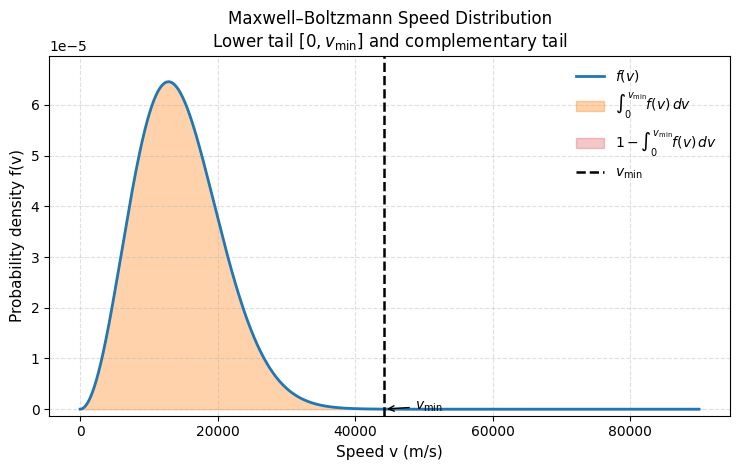

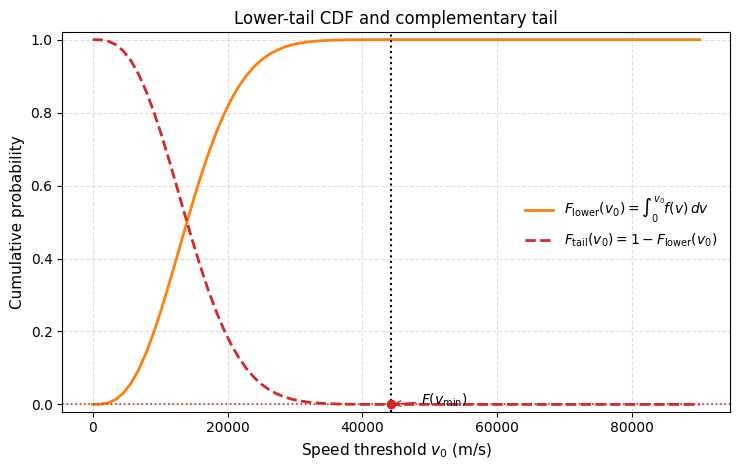

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

# ---------- PHYSICAL CONSTANTS ----------
k_B = 1.380649e-23          # Boltzmann constant, J K⁻¹
T   = 1.0e4                 # temperature, K
m_H = 1.67e-27              # hydrogen atom mass, kg

eV_to_J = 1.602176634e-19   # 1 eV in J

# ---------- HYDROGEN ENERGY LEVELS ----------
def E_n_eV(n):
    # Bohr levels: Eₙ = −13.6 eV · n⁻²
    return -13.6 / n**2

E1_eV = E_n_eV(1)
E2_eV = E_n_eV(2)
DeltaE_eV = E2_eV - E1_eV
DeltaE_J  = DeltaE_eV * eV_to_J

# Threshold speed: ½ m vₘᵢₙ² = ΔE
v_min = np.sqrt(2 * DeltaE_J / m_H)

# ---------- MAXWELL–BOLTZMANN SPEED PDF ----------
def f_MB(v):
    prefactor = (m_H / (2 * np.pi * k_B * T)) ** 1.5
    return 4 * np.pi * prefactor * v**2 * np.exp(-m_H * v**2 / (2 * k_B * T))

# ---------- RK4 INTEGRATION IN v ----------
def integrate_rk4_v(func, a, b, n):
    h = (b - a) / n
    I = 0.0
    v = a
    for _ in range(n):
        k1 = func(v)
        k2 = func(v + 0.5*h)
        k3 = func(v + 0.5*h)
        k4 = func(v + h)
        I += (h/6.0)*(k1 + 2*k2 + 2*k3 + k4)
        v += h
    return I

# Speeds
v_mean = np.sqrt(8 * k_B * T / (np.pi * m_H))
v_rms  = np.sqrt(3 * k_B * T / m_H)
v_mp   = np.sqrt(2 * k_B * T / m_H)   # most probable speed

# Effective infinity: vₘₐₓ = 7 vₘₚ
v_max = 7.0 * v_mp

# ---------- NUMBER FORMAT WITH UNICODE EXPONENTS ----------
_sup_map = str.maketrans("0123456789-", "⁰¹²³⁴⁵⁶⁷⁸⁹⁻")
def sci_uni(x, digits=3):
    if x == 0:
        return f"{0:.{digits}f}"
    expo = int(np.floor(np.log10(abs(x))))
    mant = x / 10**expo
    exp_str = str(expo).translate(_sup_map)
    return f"{mant:.{digits}f}×10{exp_str}"

# Unicode variable labels for output
v_min_txt  = "vₘᵢₙ"
v_mean_txt = "v̄"          # or use "vₘₑₐₙ"
v_mp_txt   = "vₘₚ"

print("=== Part (b): fraction of H atoms fast enough for n = 1 → 2 excitation ===\n")

print("1. Excitation energy and threshold speed")
print("   Bohr energies: Eₙ = −13.6 eV · n⁻²")
print(f"   E₁ = {E1_eV:.1f} eV,  E₂ = {E2_eV:.1f} eV")
print("   ΔE = E₂ − E₁ ≈ 10.2 eV")
print(f"   In joules: ΔE ≈ {sci_uni(DeltaE_J)} J\n")

print(f"   Threshold speed from ½ m {v_min_txt}² = ΔE:")
print(f"      {v_min_txt} = √(2 ΔE ÷ m)")
print(f"   Numerically: {v_min_txt} ≈ {sci_uni(v_min)} m/s\n")

print("2. Maxwell–Boltzmann speed distribution at 10⁴ K")
print("   f(v) = 4 π (m ÷ 2 π k T)³ᐟ² v² exp[− m v² ÷ (2 k T)]")
print(f"   {v_mean_txt} ≈ {sci_uni(v_mean)} m/s")
print(f"   {v_mp_txt}   ≈ {sci_uni(v_mp)} m/s\n")

# ---------- PART (b) VIA LOWER-TAIL INTEGRAL ----------
n_steps = 5000

# Integrate from 0 to v_min (lower tail)
F_lower = integrate_rk4_v(f_MB, 0.0, v_min, n_steps)
# Tail probability
F_tail = 1.0 - F_lower

print("3. Tail probability F = ∫[vₘᵢₙ, ∞) f(v) dv")
print(f"   Compute ∫₀^{v_min_txt} f(v) dv with RK4 and subtract from 1:")
print(f"      ∫₀^{v_min_txt} f(v) dv ≈ {F_lower:.6e} (≈ {sci_uni(F_lower)})")
print(f"      F = 1 − ∫₀^{v_min_txt} f(v) dv ≈ {F_tail:.6e} (≈ {sci_uni(F_tail)})\n")

print("Interpretation: about one atom in 10⁵ has enough kinetic energy")
print("to excite hydrogen from n = 1 to n = 2 at T = 10⁴ K.\n")

# ---------- PLOT 1: f(v) with shading ----------
v_vals = np.linspace(0, v_max, 2000)
f_vals = f_MB(v_vals)

fig1, ax1 = plt.subplots(figsize=(7.5, 4.8))

ax1.plot(v_vals, f_vals, color="C0", lw=2.0, label=r"$f(v)$")

# Shade lower tail [0, v_min]
mask_low = v_vals <= v_min
ax1.fill_between(v_vals[mask_low], 0, f_vals[mask_low],
                 color="C1", alpha=0.35,
                 label=r"$\int_0^{v_{\min}} f(v)\,dv$")

# Shade upper tail [v_min, v_max]
mask_high = v_vals >= v_min
ax1.fill_between(v_vals[mask_high], 0, f_vals[mask_high],
                 color="C3", alpha=0.25,
                 label=r"$1-\int_0^{v_{\min}} f(v)\,dv$")

# vertical line at v_min
ax1.axvline(
    v_min, color="k", lw=1.8, ls="--",
    label=r"$v_{\min}$"
)

# annotate v_min
ax1.annotate(
    r"$v_{\min}$",
    xy=(v_min, f_MB(v_min)),
    xytext=(1.1*v_min, 0.6*f_MB(v_min)),
    arrowprops=dict(arrowstyle="->", color="k", lw=1.0),
    fontsize=10,
)

ymin = -0.02 * f_vals.max()
ymax = 1.08 * f_vals.max()
ax1.set_ylim(ymin, ymax)

ax1.set_xlabel("Speed v (m/s)", fontsize=11)
ax1.set_ylabel("Probability density f(v)", fontsize=11)
ax1.set_title("Maxwell–Boltzmann Speed Distribution\n"
              r"Lower tail $[0, v_{\min}]$ and complementary tail",
              fontsize=12)

ax1.legend(loc="upper right", frameon=False)
ax1.grid(True, which="both", ls="--", alpha=0.4)
fig1.tight_layout()

# ---------- PLOT 2: CDF and complementary CDF ----------
v0_vals = np.linspace(0, v_max, 80)
F_lower_vals = np.array(
    [integrate_rk4_v(f_MB, 0.0, v0, n_steps) for v0 in v0_vals]
)
F_upper_vals = 1.0 - F_lower_vals

fig2, ax2 = plt.subplots(figsize=(7.5, 4.8))

ax2.plot(v0_vals, F_lower_vals, color="C1", lw=2,
         label=r"$F_{\mathrm{lower}}(v_0)=\int_0^{v_0} f(v)\,dv$")
ax2.plot(v0_vals, F_upper_vals, color="C3", lw=2, ls="--",
         label=r"$F_{\mathrm{tail}}(v_0)=1-F_{\mathrm{lower}}(v_0)$")

# mark v_min
ax2.axvline(v_min, color="k", lw=1.5, ls=":")
ax2.axhline(F_tail, color="C3", lw=1.2, ls=":")
ax2.scatter([v_min], [F_tail], color="C3", zorder=5)

ax2.annotate(
    r"$F(v_{\min})$",
    xy=(v_min, F_tail),
    xytext=(1.1*v_min, 0.7*F_tail),
    arrowprops=dict(arrowstyle="->", color="C3", lw=1.0),
    fontsize=10,
)

ax2.set_xlabel(r"Speed threshold $v_0$ (m/s)", fontsize=11)
ax2.set_ylabel("Cumulative probability", fontsize=11)
ax2.set_title("Lower-tail CDF and complementary tail", fontsize=12)

ax2.set_ylim(-0.02, 1.02)
ax2.legend(loc="center right", frameon=False)
ax2.grid(True, which="both", ls="--", alpha=0.4)
fig2.tight_layout()

plt.show()
